# Well, Well Wellness Aps :
A comparative analysis of top 5 grossing health/wellness apps - customer clustering and sentiment analysis using NLP to  examine highest and lowest app reviews to inform what is going well and what could be improved in the world of wellness apps. 

# Background: 
https://imtinnovation.com/digital-health/health-and-wellness-apps
    
    
    


# Obtain:

Inspired by: https://www.curiousily.com/posts/create-dataset-for-sentiment-analysis-by-scraping-google-play-app-reviews-using-python/ SEVERAL copies of this same project exist in various formats by various authors.

going to App Annie and looking at top grossing wellness apps:
https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=

In [1]:
#!pip install google_play_scraper

In [84]:
%conda install -c conda-forge jupyter_contrib_nbextensions
%conda install jupyter_nbextensions_configurator

Solving environment: ...working... 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::gensim==3.8.0=py36hf9181ef_0
  - glemaitre/win-64::imbalanced-learn==0.2.1=py36_0
  - defaults/win-64::patsy==0.5.1=py36_0
  - defaults/win-64::py-xgboost==0.90=py36_0
  - defaults/win-64::scikit-learn==0.22.1=py36h6288b17_0
  - defaults/win-64::seaborn==0.9.0=py36_0
  - defaults/win-64::statsmodels==0.10.1=py36h8c2d366_0
done

## Package Plan ##

  environment location: C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env

  added / updated specs:
    - jupyter_contrib_nbextensions


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         184 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         152 KB  conda-forge
    openssl-1

In [ ]:
!jupyter nbextension enable execute_time/ExecuteTime
!jupyter nbextension enable toc2/main
!jupyter nbextension enable livemdpreview/livemdpreview
!jupyter nbextension enable collapsible_headings/main
!jupyter nbextension enable spellchecker/main
!jupyter nbextension enable codefolding/main
!jupyter nbextension enable ruler/main

In [2]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
plt.style.use('seaborn-notebook')

## Top 5 Wellness Apps:

According to [appannie](https://www.appannie.com/apps/google-play/top-chart/?country=US&category=19&device=&date=2020-04-05&feed=All&rank_sorting_type=rank&page_number=0&page_size=100&table_selections=), the top five grossing wellness apps on July 1 for the google play store in order:

1. Calm
* MyFitnessPal
* Headspace
* Me
* Fitbit

Rankings change daily.

Data on each package was obtained using [google play scraper](https://pypi.org/project/google-play-scraper/). Overviews of each app can be observed below:

In [3]:
#creating a list of top apps based on their google play app id

app_packages = [
    'com.calm.android',
    'com.myfitnesspal.android',
    'com.getsomeheadspace.android', 
    'com.gen.workoutme',
    'com.fitbit.FitbitMobile'
]

In [4]:
#obtaining information on each app and descriptive history using google_play_scraper api
app_infos = []

for ap in tqdm(app_packages):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

100%|██████████| 5/5 [00:02<00:00,  1.88it/s]


In [5]:
app_infos_df = pd.DataFrame.from_records(app_infos)

In [6]:
#app_infos_df.to_csv('app_infos_72720')
#saved file since every download grabs different data

##  App Descriptions and Summaries below:

In [7]:
app_infos_df

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,...,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,appId,url
0,"Calm - Meditate, Sleep, Relax",Calm is a leading app for meditation and sleep...,Calm is a leading app for meditation and sleep...,Join the millions discovering the life-changin...,Join the millions discovering the life-changin...,"10,000,000+",10000000,4.396180,277352,92466,...,None,None,None,"Jul 30, 2014",1595540463,Varies with device,"As always, you can expect an original Daily Ca...","As always, you can expect an original Daily Ca...",com.calm.android,https://play.google.com/store/apps/details?id=...
1,Calorie Counter - MyFitnessPal,"Whether you want to lose weight, tone up, get ...","Whether you want to lose weight, tone up, get ...","Lose weight with MyFitnessPal, the easiest cal...","Lose weight with MyFitnessPal, the easiest cal...","50,000,000+",50000000,4.446320,2316033,810644,...,None,True,True,"Apr 26, 2010",1595901200,Varies with device,Whether you want to log your lowest weight in ...,Whether you want to log your lowest weight in ...,com.myfitnesspal.android,https://play.google.com/store/apps/details?id=...
2,Headspace: Meditation & Sleep,Stress less. Sleep soundly. Get happy. Learn t...,Stress less. Sleep soundly. Get happy. Learn t...,Meditation and mindfulness in just a few minut...,Meditation and mindfulness in just a few minut...,"10,000,000+",10000000,3.540874,134741,54721,...,None,None,None,"Jan 6, 2012",1596137230,4.4.1,The latest release features a fresh all-new lo...,The latest release features a fresh all-new lo...,com.getsomeheadspace.android,https://play.google.com/store/apps/details?id=...
3,BetterMe: Home Workouts & Diet,BetterMe: Home Workouts & Diet To Lose Weight ...,BetterMe: Home Workouts &amp; Diet To Lose Wei...,"Weight Loss Workout: Abs, Butt, Legs and Whole...","Weight Loss Workout: Abs, Butt, Legs and Whole...","10,000,000+",10000000,4.044521,81078,31300,...,None,None,None,"Jul 27, 2017",1595599126,3.9.1,Bug fixes and performance improvements.,Bug fixes and performance improvements.,com.gen.workoutme,https://play.google.com/store/apps/details?id=...
4,Fitbit,Start a free 90-day trial of Fitbit Premium fo...,Start a free 90-day trial of Fitbit Premium fo...,Fitbit is dedicated to helping people lead hea...,Fitbit is dedicated to helping people lead hea...,"50,000,000+",50000000,3.827088,677861,310159,...,None,None,None,"Mar 16, 2012",1595979141,Varies with device,*Bug fixes and performance improvements,*Bug fixes and performance improvements,com.fitbit.FitbitMobile,https://play.google.com/store/apps/details?id=...


A helper function from the inspiration project to read .json files: 

In [8]:
def print_json(json_object):
    json_str = json.dumps(
        json_object,
        indent=2,
        sort_keys=True,
        default=str)
    #cool feature to help highlight specificied string
    print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [9]:
print_json(app_infos[4])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.fitbit.FitbitMobile",
  "containsAds": null,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. \r\n\r\nSay hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. \r\n\r\nA free app that tracks your day & progress over time\r\nFind free workouts, nutrition programs, meditation tracks, sleep tools & more \r\nConnect with fr

  "descriptionHTML": "Start a free 90-day trial of Fitbit Premium for personalized guidance, customized health programs and 240+ video workouts you can do at home. <br><br>Say hello to one of the world\u2019s leading apps for health and fitness. Use the Fitbit app on it\u2019s own to join our community, track basic stats and stay motivated on your journey. Or, get a Fitbit tracker or smartwatch to see how your activity, workouts, sleep, nutrition and stress all fit together. Either way, you\u2019ll find the information and inspiration you need to reach your goals\u2014all in one place. <br><br>A free app that tracks your day &amp; progress over time<br>Find free workouts, nutrition programs, meditation tracks, sleep tools &amp; more <br>Connect with friends, start challenges &amp; join an inspiring community<br>Set goals, earn achievement badges &amp; celebrate milestones<br>Automatically sync your data to 3,000+ popular partner apps<br>Access innovative smartwatch apps &amp; fresh clo

In [10]:
app_packages[4]

'com.fitbit.FitbitMobile'

### logos:

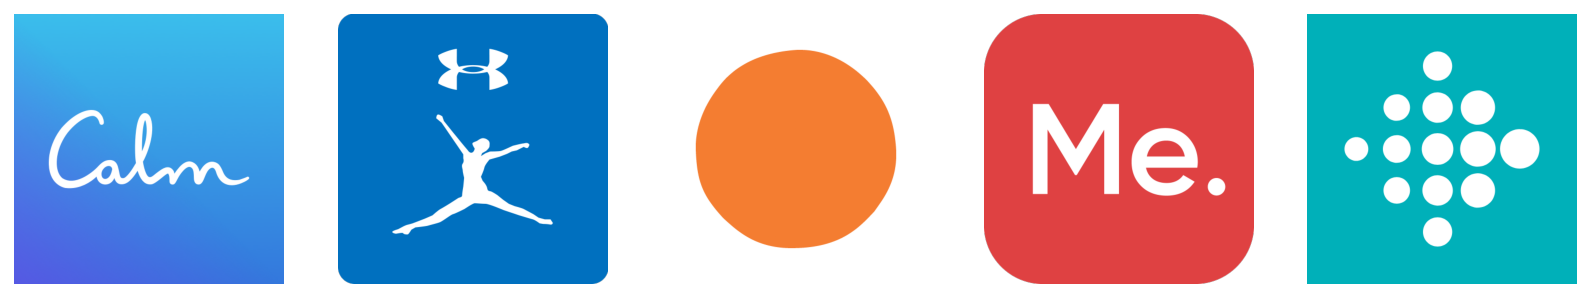

In [11]:
def format_title(title):
    sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if sep_index != -1:
        title = title[:sep_index]
        return title[:15]
fig, axs = plt.subplots(1,5,figsize=(14, 5))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
#     ax.set_title(format_title(ai['title']))
    ax.axis('off')

### Obtaining app reviews:

In [12]:
help(reviews)

Help on function reviews in module google_play_scraper.features.reviews:

reviews(app_id, lang=None, country=None, sort=None, count=None, filter_score_with=None, continuation_token=None)



In [13]:
#looking at top three most relevant reviews from calm and exploring the reviews function and learning...
calm, continuation_token = reviews('com.calm.android', lang='en', country='us',sort=Sort.MOST_RELEVANT, count=3)
calm

[{'reviewId': 'gp:AOqpTOEtH7HaDAyL040EXcXI6-NkTLq5pFhVhAmuJPBr-6gPJS9VQE50n8g1K7HXHriQ3LvvKbHlBl3Y9Q2Jqg',
  'userName': 'Brogan Houston',
  'userImage': 'https://lh3.googleusercontent.com/-We6TPXjnrQ8/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuckzks_EK82DlT4ycCeCyJzndjAENQ/photo.jpg',
  'content': 'I don\'t care about all the sleep stories, I just use the app for the white noise. Frequently throughout the night, I\'ll have the white noise playing and it will just stop for no apparent reason, even when I have the timer set for 8 hours. I\'ll open the app to resume the sound, and the stupid pop-up windows come up saying, "Great Job!" and it doesn\'t let me close those windows for a good few seconds, allowing me to fully wake up before I can get my white noise going again. Very frustrating.',
  'score': 1,
  'thumbsUpCount': 835,
  'reviewCreatedVersion': '4.29',
  'at': datetime.datetime(2020, 7, 11, 9, 6, 57),
  'replyContent': None,
  'repliedAt': None},
 {'reviewId': 'gp:AOqpTOEy__Hsix8SgQW5-8djW2

Resources for api usage: 
https://github.com/JoMingyu/google-play-scraper

better than this one: 
https://github.com/facundoolano/google-play-scraper#reviews


In [14]:
#iterating through each of the app packages to grab reviews on each grabbing 10K each based on relevance of review
results = []
for ap in tqdm(app_packages):
    result, continuation_token = reviews(
    ap,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT SQL-like calls
    count = 10000, # defaults to 100, returns number of records you want
    filter_score_with=None) # defaults to None(means all score) might be usefull to scrape some more low scores if needed
    
    for a in result:
        a['application'] = ap #tracking which app we grabbed review of
        
    results.extend(result)

100%|██████████| 5/5 [01:53<00:00, 22.63s/it]


In [15]:
#making sure 10K of each app showed up:
len(results)

50000

In [16]:
#creating files to work from and .csv if needed
app_reviews_df = pd.DataFrame(results)
#app_reviews_df.to_csv('reviews.csv', index=None, header=True)

## Data Description

|**Field**  | **Description**|
|--|--|
|ReviewId | a unique identifier for each review|
|userName  | Name of user that reviewed the product|
|userImage | User avatar
|content | The text supporting the stars assigned at the review|
|thumbsUpCount | count of how many other users appreciated the review (helps for relevance)|
|reviewCreatedVersion | The version of the app being reviewed|
|at | the review date
|replyContent | Text/content if there is a reply to a review from the app administrators|
|repliedAt | Timestamp for the replyContent field
|application| the app being reviewed


In [17]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application
0,gp:AOqpTOEtH7HaDAyL040EXcXI6-NkTLq5pFhVhAmuJPB...,Brogan Houston,https://lh3.googleusercontent.com/-We6TPXjnrQ8...,"I don't care about all the sleep stories, I ju...",1,835,4.29,2020-07-11 09:06:57,None,NaT,com.calm.android
1,gp:AOqpTOEy__Hsix8SgQW5-8djW2RqnS3Yfp9cTsJPk8G...,Aubrey Karim,https://lh3.googleusercontent.com/-_V1wVCSPVrw...,This app is great for sleep and for meditation...,4,338,4.29,2020-07-07 16:40:53,None,NaT,com.calm.android
2,gp:AOqpTOFuuTaHyzeTDn_OMc8aJdsIwGiQ2O7zB-f7I-u...,Glenneroo,https://lh3.googleusercontent.com/a-/AOh14GgIF...,Can't even try the app without creating a logi...,1,693,4.29,2020-07-07 19:32:31,None,NaT,com.calm.android
3,gp:AOqpTOEVrkdHF8x6kk7t7rESpoSzsk2yY3I5b19zS_P...,Nathan T.,https://lh3.googleusercontent.com/-_gIxpXuntNI...,Not sure why the low reviews. But this is a re...,5,304,4.29,2020-07-07 21:05:20,None,NaT,com.calm.android
4,gp:AOqpTOFHTAQU4MK4zFR3nKvcr2UcPfsXLjzUnkM3GEW...,Kylie O,https://lh3.googleusercontent.com/a-/AOh14Gjfn...,this app is really great other than the fact t...,3,523,4.29,2020-07-15 05:49:42,None,NaT,com.calm.android


# Scrub / Clean

In [18]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    45185 non-null object
at                      50000 non-null datetime64[ns]
replyContent            19188 non-null object
repliedAt               19188 non-null datetime64[ns]
application             50000 non-null object
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.2+ MB


**Target value counts:**

In [19]:
app_reviews_df['score'].value_counts()

5    20233
1    14061
4     6676
3     4606
2     4424
Name: score, dtype: int64

>**Observation:** The intentional choice to select the most relevant reviews has paid off, it's good to see a mix of postive and negative reviews and not as imbalanced as in cases past.  :-P  Next up: A look into missing data.

### Missing Data:

In [20]:
import missingno as msno

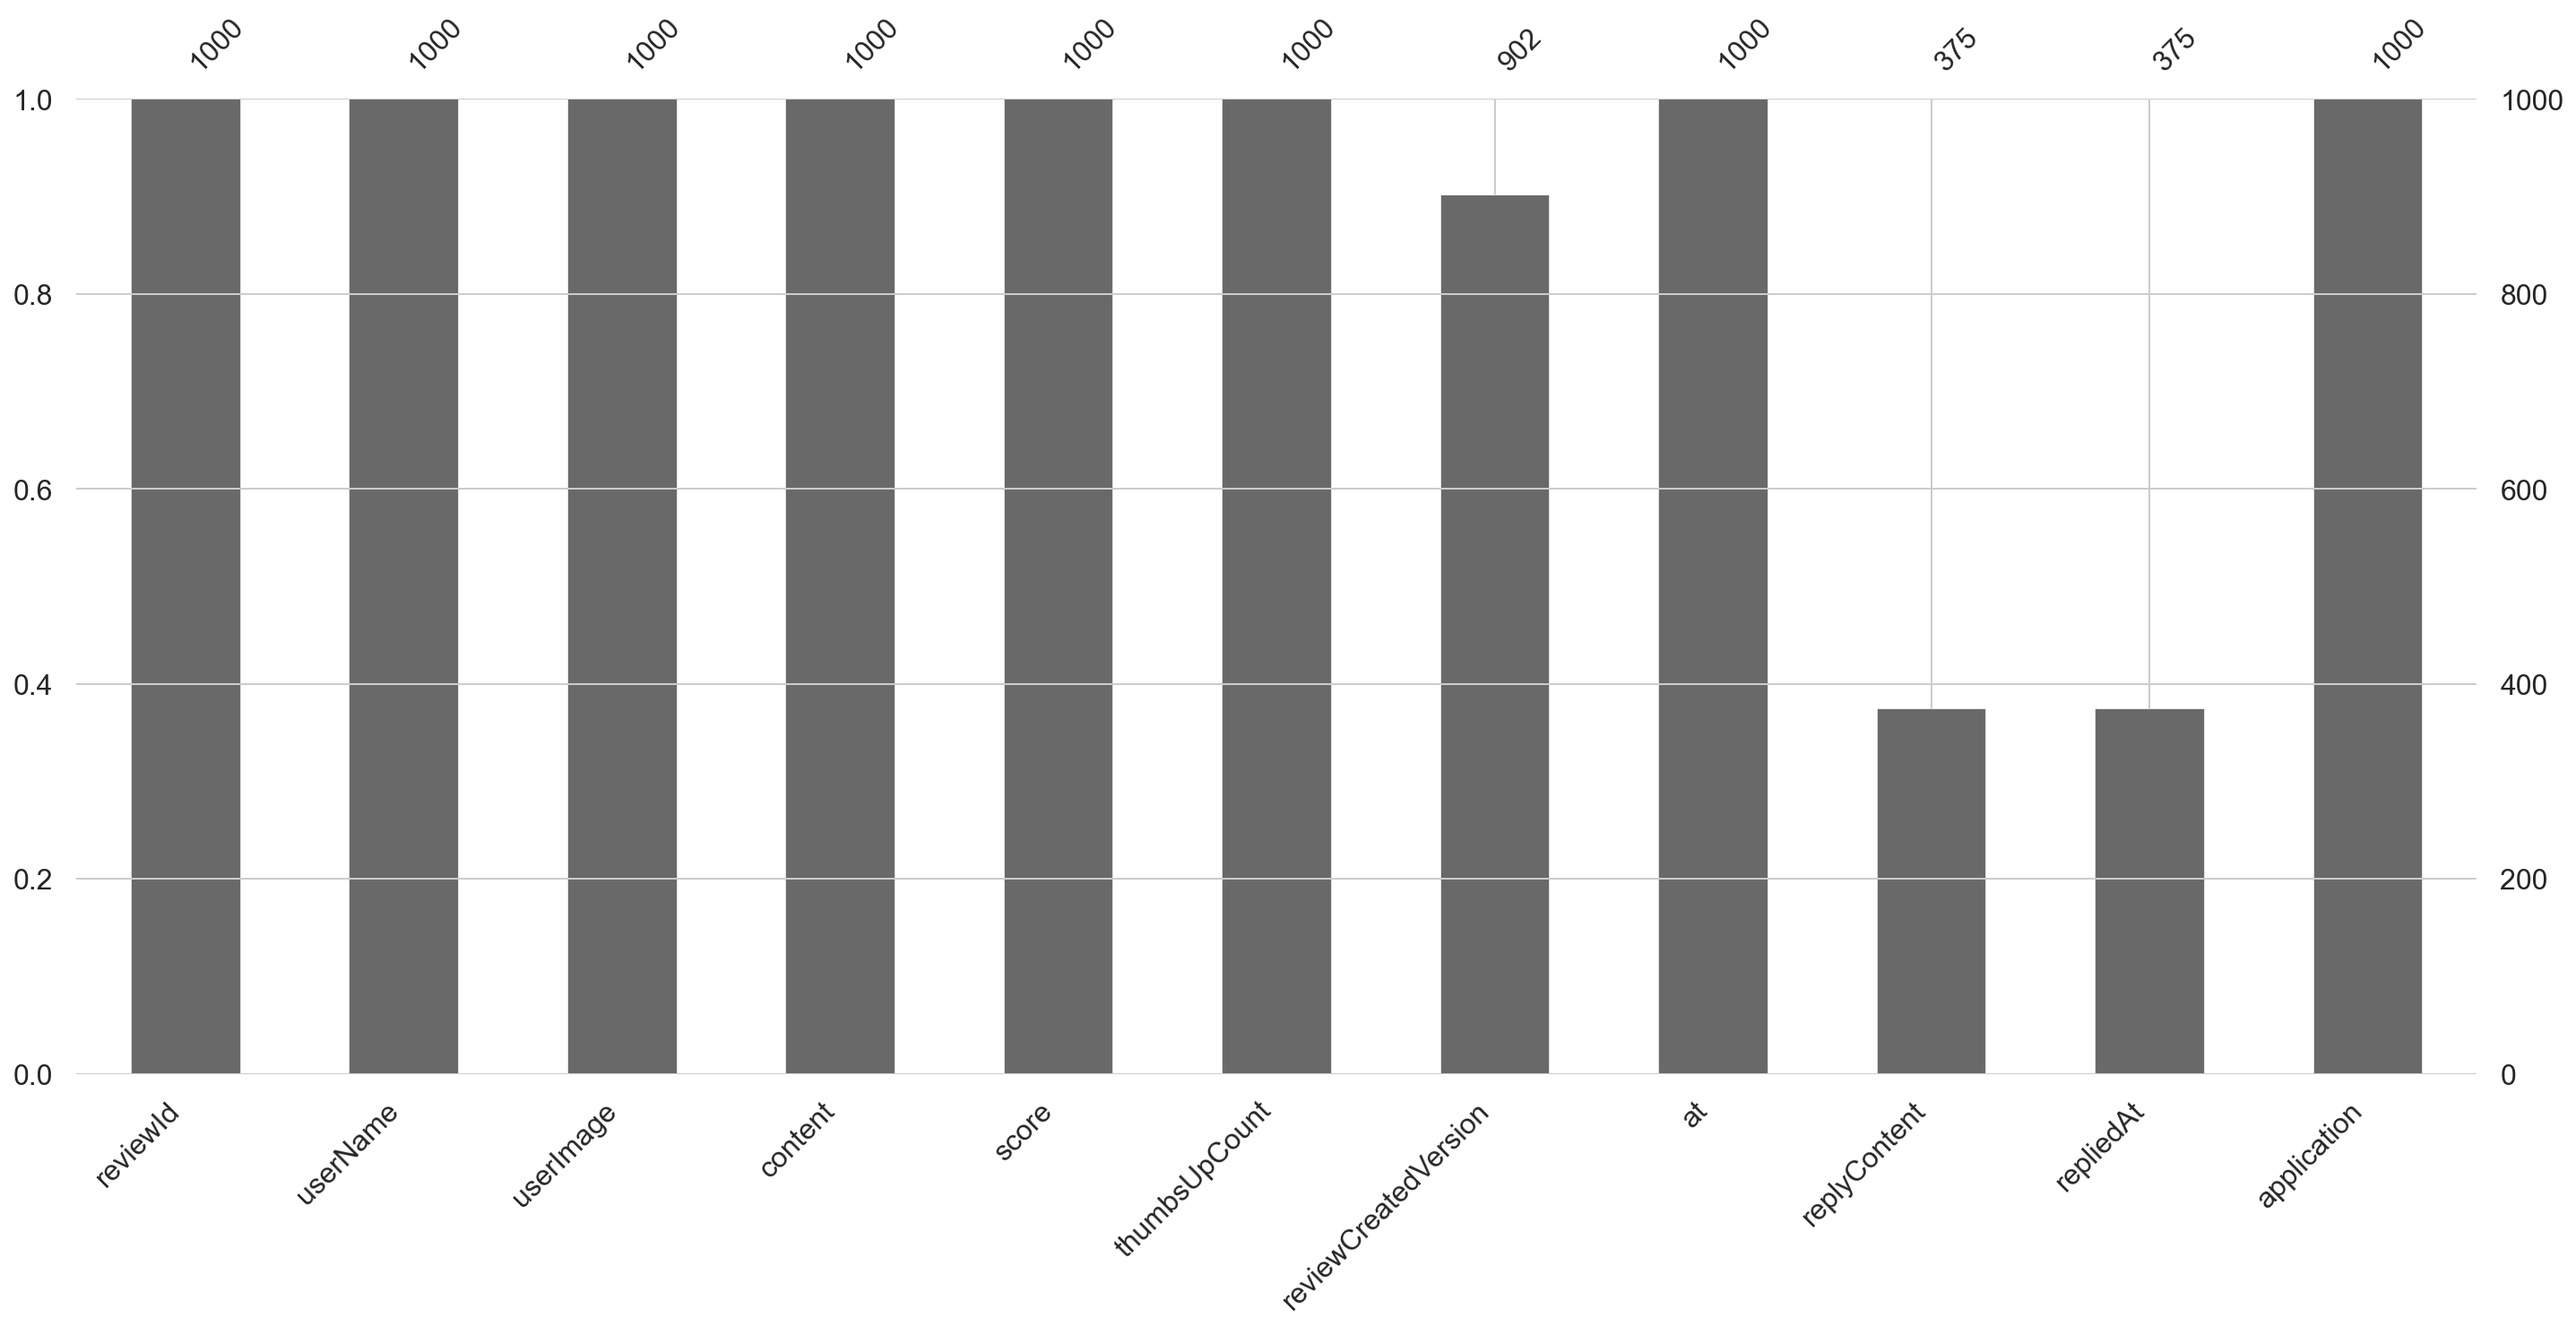

In [21]:
msno.bar(app_reviews_df.sample(1000))

In [22]:
#reviewCreatedVersion is almost 10% of the data... for now filling in with a '.' to keep the data numeric'
#and previewing the data to look for obvious patterns 
missingvers = app_reviews_df.loc[app_reviews_df['reviewCreatedVersion'].isna()]
missingvers.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application
3387,gp:AOqpTOE8Eb6zN0PndR2BzsNiX8Eom3fZsVgwjpRZ9kd...,Brazil Uluwita,https://lh3.googleusercontent.com/a-/AOh14GiiV...,I downloaded this application and immediately ...,1,0,None,2020-07-09 08:59:47,None,NaT,com.calm.android
3389,gp:AOqpTOHEb71QUbBxe0QmLcjs_gmyx-AHpzDGWY9Rgdq...,Alex Fixler,https://lh3.googleusercontent.com/-UYuiwOsZ48Q...,"The ""How to Meditate"" 30 day course is really ...",3,1,None,2020-07-28 21:45:49,None,NaT,com.calm.android
3412,gp:AOqpTOFiiAJsuJAwIPAnjmcsDZMPHCeUiPPVPZWUtYK...,clary !,https://lh3.googleusercontent.com/a-/AOh14GjY-...,"it's really not that bad, it's just that, some...",4,2,None,2020-07-08 18:49:47,None,NaT,com.calm.android
3419,gp:AOqpTOGlFq9L0PJmg_CoQ_ND0F25hfPCHzGAP4jUVdS...,Momeari Katoka,https://lh3.googleusercontent.com/-NhSiF1KaL70...,Had a free trial for a month (used the app twi...,1,2,None,2020-07-28 23:27:49,None,NaT,com.calm.android
3429,gp:AOqpTOGyZ_I-zJbSnWvZr7NvrCP0vRErh9htOUfiJRm...,ッGirls,https://lh3.googleusercontent.com/a-/AOh14GjHc...,"This app is PERFECT. And yes, I'm a 9 year old...",4,0,None,2020-07-02 21:17:50,None,NaT,com.calm.android


In [23]:
app_reviews_df['reviewCreatedVersion'].fillna('.', inplace=True)

In [24]:
#creating a field to indicate whether or not someone replied to a review
app_reviews_df['replied'] = app_reviews_df['replyContent'].notnull()
app_reviews_df['replied'].value_counts(normalize=True)

False    0.61624
True     0.38376
Name: replied, dtype: float64

In [25]:
app_reviews_df['replyContent'].fillna('n/a', inplace=True)
app_reviews_df['repliedAt'].fillna('_', inplace=True)

In [26]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
reviewId                50000 non-null object
userName                50000 non-null object
userImage               50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(8)
memory usage: 4.2+ MB


### Dropping columns: 

In [27]:
#there are no reviewIds that are duplicated, see no value in this content
#it's easier to index of of other numbers for slicing, so dropping this feature:
app_reviews_df['reviewId'].duplicated().value_counts()

False    50000
Name: reviewId, dtype: int64

In [28]:
app_reviews_df.drop('reviewId', axis=1, inplace=True)

In [29]:
app_reviews_df['userImage'][8]
#not focus of this project so dropping images
app_reviews_df.drop('userImage', axis=1, inplace=True)

In [30]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
userName                50000 non-null object
content                 50000 non-null object
score                   50000 non-null int64
thumbsUpCount           50000 non-null int64
reviewCreatedVersion    50000 non-null object
at                      50000 non-null datetime64[ns]
replyContent            50000 non-null object
repliedAt               50000 non-null object
application             50000 non-null object
replied                 50000 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 3.5+ MB


# Exploratory Data Analysis:

## 👀 A first look at the data: Ratings Across Apps

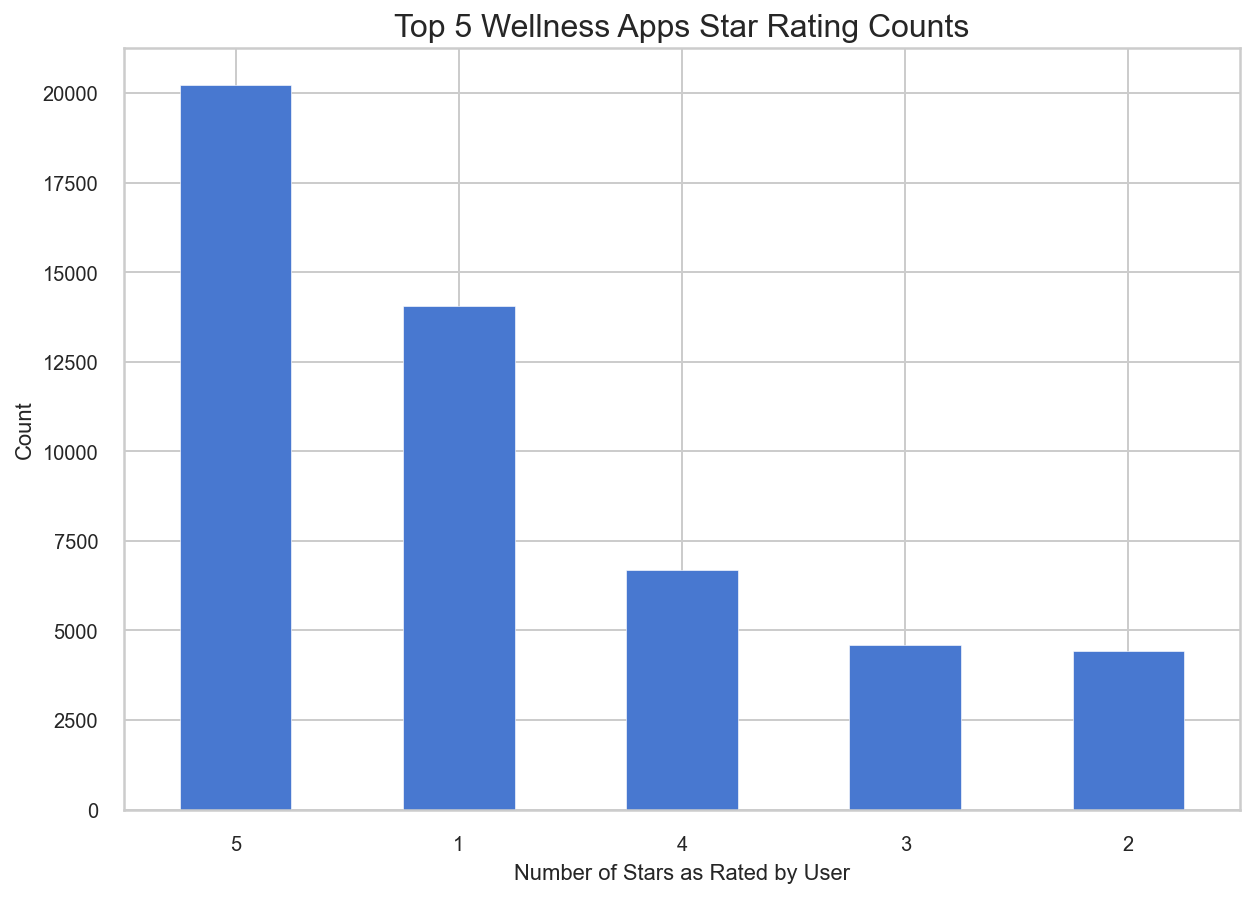

In [31]:
#counting how many reviews fall into each category
app_reviews_df['score'].value_counts().plot(kind='bar', figsize=(10,7))
plt.title('Top 5 Wellness Apps Star Rating Counts', fontsize=16)
plt.xlabel('Number of Stars as Rated by User')
plt.xticks(rotation=0) 
plt.ylabel('Count')
plt.show()

>**Observation:** Top and bottom ratings are the most frequently occuring accross all 5 apps. This makes sense, since they are the highest and lowest rated scores and informative when people are considering a product. The accompanying content of a review could inform best practice as well as greatest opportunity to improve and is the intentional objective of this work.

In [32]:
app_reviews_df['application'].value_counts()

com.fitbit.FitbitMobile         10000
com.myfitnesspal.android        10000
com.getsomeheadspace.android    10000
com.calm.android                10000
com.gen.workoutme               10000
Name: application, dtype: int64

### 👀 Comparing Apps in Terms of Ratings:

In [33]:
#creating a dataframe for each app for potential future use
calm_df = app_reviews_df[app_reviews_df['application'] == 'com.calm.android']
fitpal_df = app_reviews_df[app_reviews_df['application'] == 'com.myfitnesspal.android']
me_df = app_reviews_df[app_reviews_df['application'] == 'com.gen.workoutme']
headspace_df = app_reviews_df[app_reviews_df['application'] == 'com.getsomeheadspace.android']
fitbit_df = app_reviews_df[app_reviews_df['application'] == 'com.fitbit.FitbitMobile']

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
# fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(12,9))

# for app in app_reviews_df['application'].unique():
#     app.value_counts().plot(kind='bar', title=app)

# ✔️ only last df displaying: look at section 6 custimizing viz with matplotlib lab

In [36]:
app_dict = {'Calm': calm_df, 'MyFitnessPal' : fitpal_df, 'WorkoutMe' : me_df,
          'Headspace' : headspace_df,'FitBit' : fitbit_df}

TypeError: 'AxesSubplot' object is not iterable

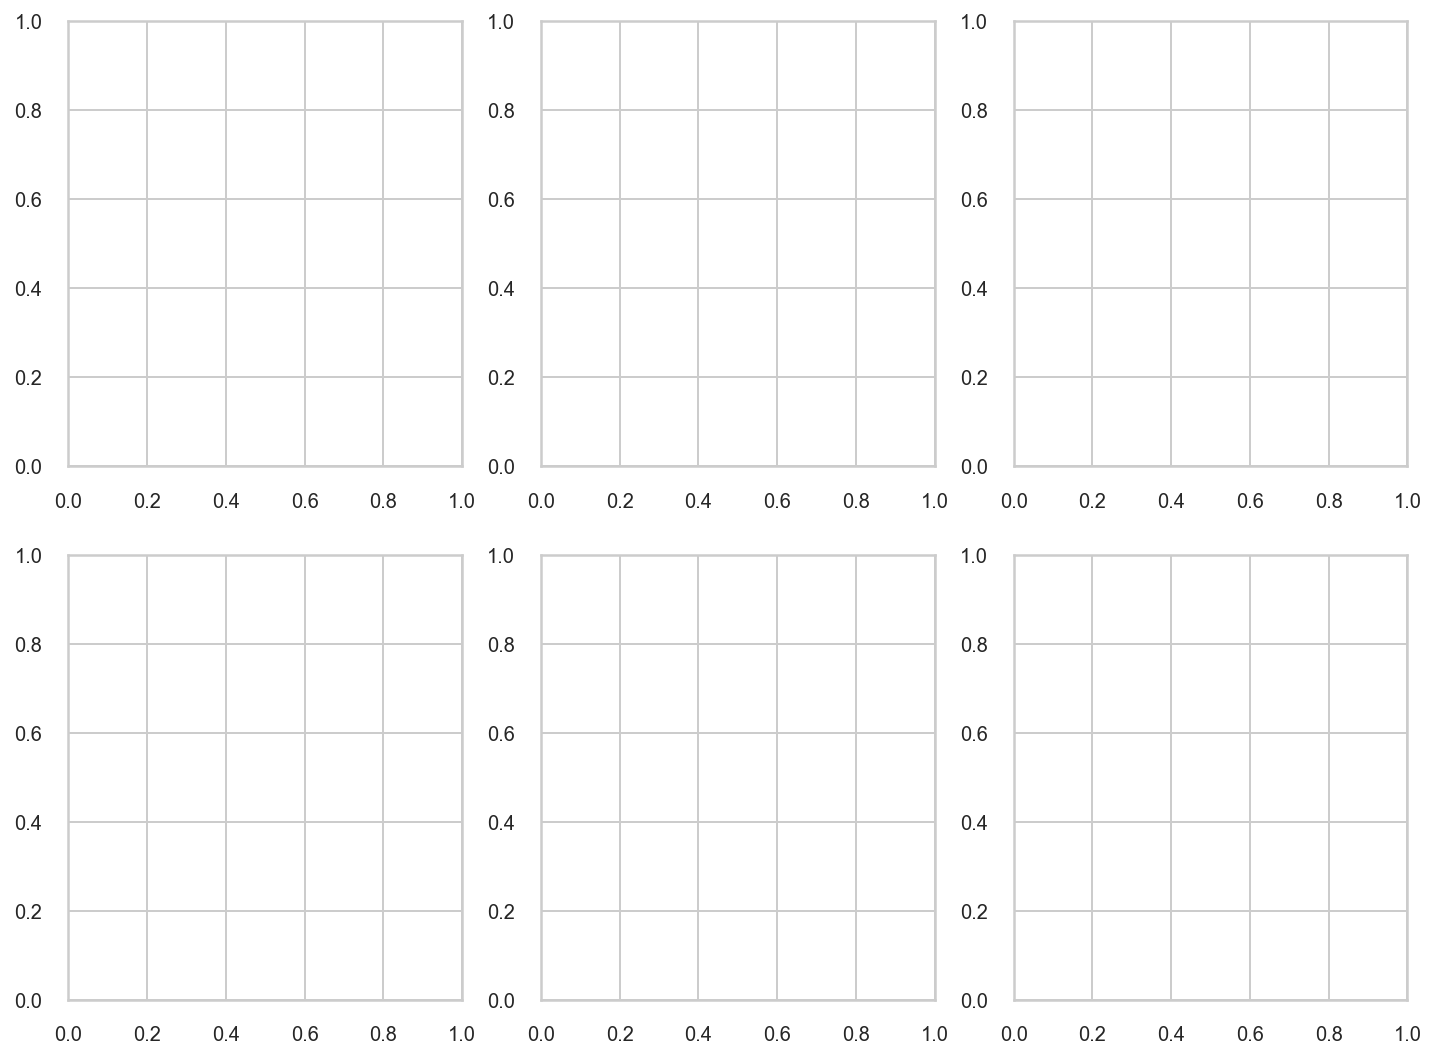

In [85]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
axs = axs.flatten()

for app, app_df in app_dict.items():
    for num, i in enumerate(axs):
        app_df['score'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=i, title=app)

        fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)

        for ax in axs.flatten():
            ax.set_xlabel('Stars')
            ax.set_ylabel('Frequency')


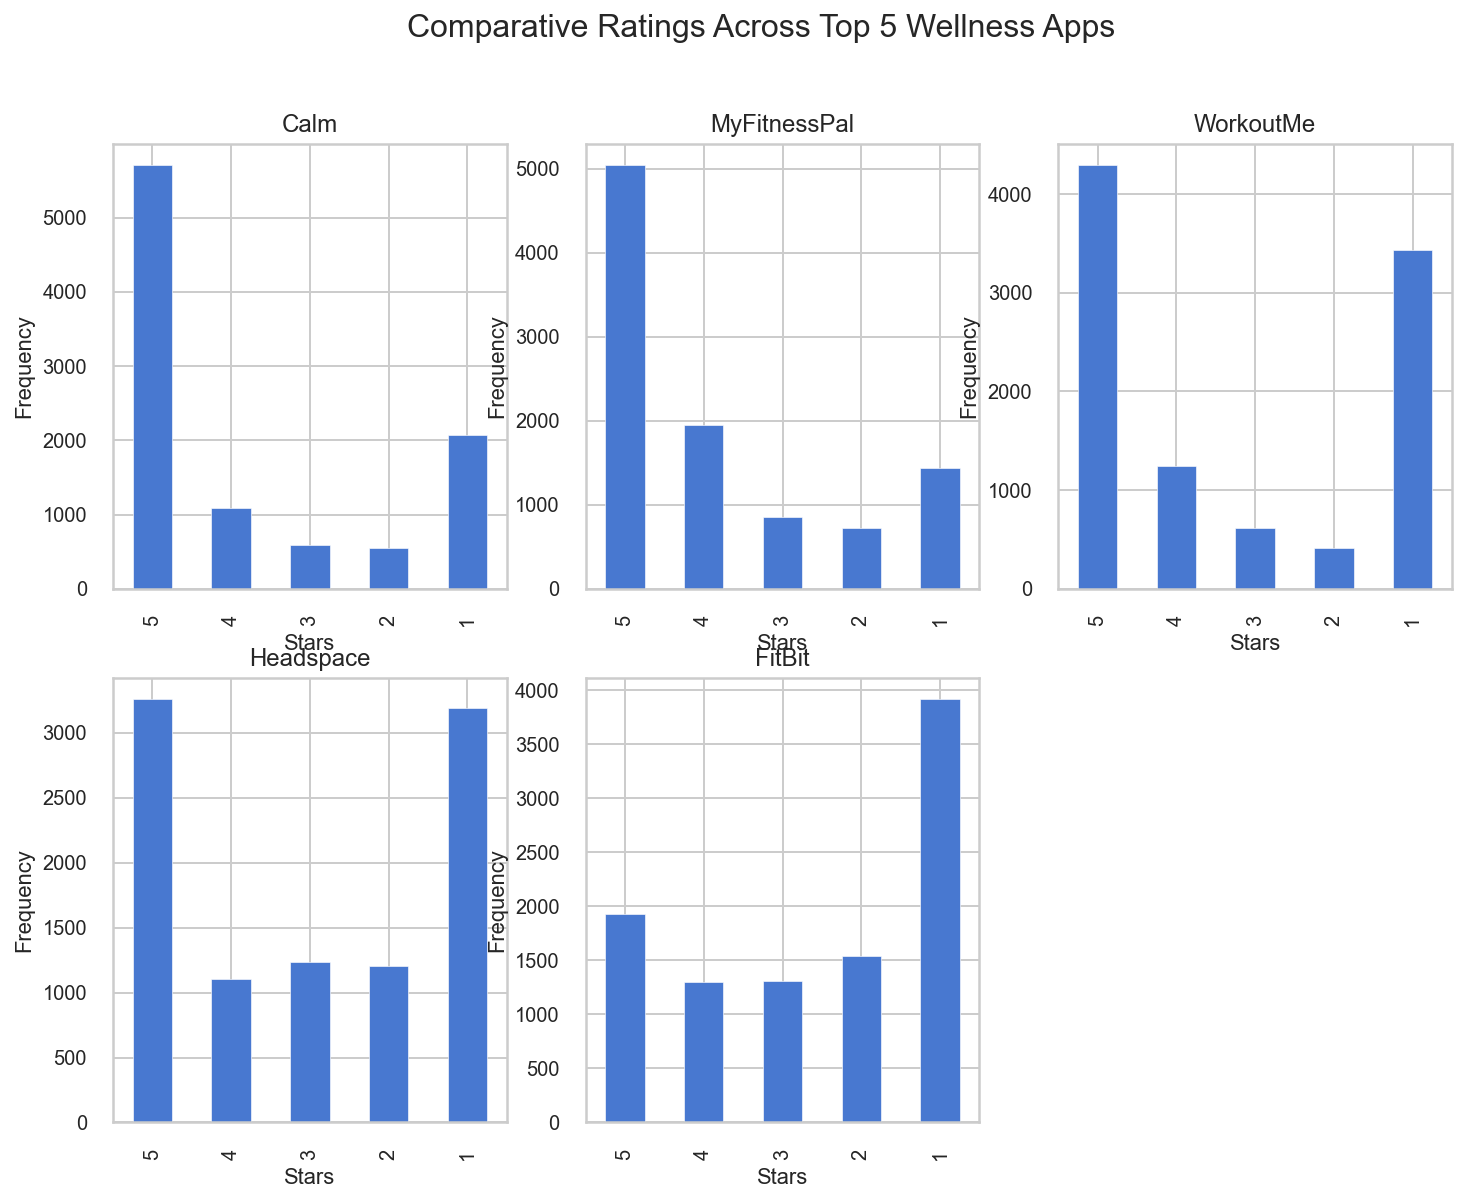

In [38]:
#comparing each app in terms of ratings(need to clean code see subsequent cells)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))

calm_df['score'].value_counts().sort_index(ascending=False).plot(kind='bar',ax=axs[0][0], title='Calm')
fitpal_df['score'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=axs[0][1], title='MyFitnessPal')
me_df['score'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=axs[0][2], title='WorkoutMe')
headspace_df['score'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=axs[1][0], title='Headspace')
fitbit_df['score'].value_counts().sort_index(ascending=False).plot(kind='bar', ax=axs[1][1], title='FitBit')
fig.delaxes(ax=axs[1][2])

fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)

for ax in axs.flatten():
    ax.set_xlabel('Stars')
    ax.set_ylabel('Frequency')
    #plt.show()


>**Observation:**  5s and 1's carry over into the individual apps as the most frequent in most cases. One exception is MyFitnessPal.  This pattern makes sense since these reviews were filtered by relevance.  The highest and lowest rating is what informs consumers.  
> Interesting comparing mediation apps:  
    * Calm has more than 2.5 times 5 star ratings and Headspace has almost equal 1 and 5 star ratings.  
> In the space of fitness tracking apps:
    * Fitbit has a majority count of 1 star ratings AND is among top grossing apps? 


In [39]:
app_reviews_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application,replied
0,Brogan Houston,"I don't care about all the sleep stories, I ju...",1,835,4.29,2020-07-11 09:06:57,n/a,_,com.calm.android,False
1,Aubrey Karim,This app is great for sleep and for meditation...,4,338,4.29,2020-07-07 16:40:53,n/a,_,com.calm.android,False
2,Glenneroo,Can't even try the app without creating a logi...,1,693,4.29,2020-07-07 19:32:31,n/a,_,com.calm.android,False
3,Nathan T.,Not sure why the low reviews. But this is a re...,5,304,4.29,2020-07-07 21:05:20,n/a,_,com.calm.android,False
4,Kylie O,this app is really great other than the fact t...,3,523,4.29,2020-07-15 05:49:42,n/a,_,com.calm.android,False


### df1: Squeaky wheels get the grease? Looking into how often a repeat reviewer gets replied to.

In [40]:
#creating a copy of file for eda
df = app_reviews_df.copy()

In [41]:
#Hypothesising replyContent is in response to reviews - probably bad ones - 
#isolating only those with replyContent:
df1 = df[df['replyContent']!='n/a']

In [42]:
df1['score'].value_counts(normalize=True)

1    0.468835
5    0.235408
2    0.125599
3    0.090317
4    0.079842
Name: score, dtype: float64

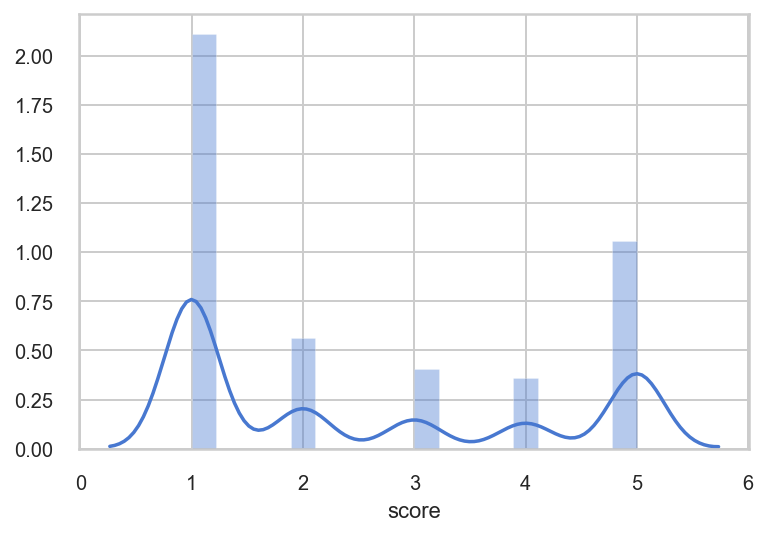

In [43]:
#creating a visualization to 'see' distribution of replies in relation to scores.
reply_content_counts = df1['score']
sns.distplot(reply_content_counts)

**Majority (~ 47%) scores for replyContent response are 1 star reviews...  confirms hypothesis that this field is in response to poor reviews see examples below, but also gives insight that responses also occur for most positive comments as well (24%)**

### 👀  Which app replies more? WorkoutMe...  5 Stars, 1 Stars, 4 Stars

Rating: 5 stars


com.gen.workoutme               4293
com.getsomeheadspace.android      98
com.myfitnesspal.android          63
com.fitbit.FitbitMobile           46
com.calm.android                  17
Name: application, dtype: int64


--------
Rating: 1 stars


com.gen.workoutme               3433
com.getsomeheadspace.android    1864
com.myfitnesspal.android        1302
com.calm.android                1215
com.fitbit.FitbitMobile         1182
Name: application, dtype: int64


--------
Rating: 2 stars


com.getsomeheadspace.android    719
com.myfitnesspal.android        616
com.fitbit.FitbitMobile         469
com.gen.workoutme               410
com.calm.android                196
Name: application, dtype: int64


--------
Rating: 3 stars


com.getsomeheadspace.android    663
com.gen.workoutme               616
com.fitbit.FitbitMobile         424
com.myfitnesspal.android         19
com.calm.android                 11
Name: application, dtype: int64


--------
Rating: 4 stars


com.gen.workoutme               1243
com.fitbit.FitbitMobile          116
com.getsomeheadspace.android      94
com.myfitnesspal.android          62
com.calm.android                  17
Name: application, dtype: int64


--------


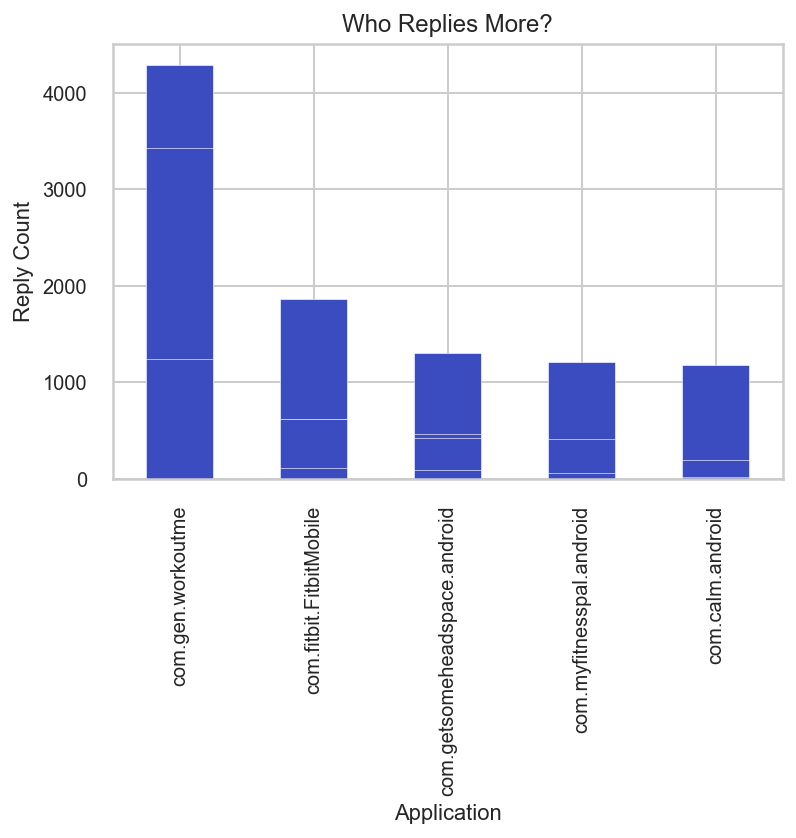

In [44]:
for group in list(df1['score'].unique()):
    reply_count = df1.groupby('score').get_group(group)['application'].value_counts()
    print(f'Rating: {group} stars')
    display(reply_count)
    print()
    print('--------')
    #cmap = [(5,'blue'), 4:'turquoise', 3:'lightblue', 2:'lightgreen',1:'green' }
    reply_count.plot(kind='bar', colormap='coolwarm', title=('Who Replies More?'))
    plt.xlabel('Application')
    plt.ylabel('Reply Count')


### A look at 'repeat reviewers':

In [45]:
repeat_comments = app_reviews_df[app_reviews_df.duplicated(['userName','application'], keep=False)].sort_values('userName')
print(f'The set of repeat reviewers is {len(repeat_comments)} rows.')
av_score = round(repeat_comments['score'].mean(),1)
print(f'The average score of repeat reviers is {av_score}')
repeat_comments


The set of repeat reviewers is 1733 rows.
The average score of repeat reviers is 3.4


,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application,replied
19732,A A,"Used to be a great app, now it doesn't even lo...",1,0,20.7.0,2020-05-15 18:30:25,Our apologies for any problems you are having....,2020-05-17 12:06:29,com.myfitnesspal.android,True
19865,A A,I can't install it (((. Tried few times. When ...,1,0,20.6.0,2020-04-08 06:01:28,We are truly sorry for any issues you are havi...,2020-04-08 08:28:35,com.myfitnesspal.android,True
41509,A B,This is ridiculous 😒 I literally have not been...,1,0,3.21,2020-05-25 02:02:01,Hi there - Thanks for trying a fix. Sorry to h...,2020-05-27 05:00:42,com.fitbit.FitbitMobile,True
46263,A B,Awesome app... easy to maneuver around...,5,0,3.22.1,2020-07-24 05:43:44,n/a,_,com.fitbit.FitbitMobile,False
49870,A B,I wish the app would sync faster when I wanna ...,4,0,3.18,2020-04-08 06:42:32,n/a,_,com.fitbit.FitbitMobile,False
...,...,...,...,...,...,...,...,...,...,...
23326,h k,"Hey guys, first of all, I adore this app like ...",5,1,3.35.0,2019-10-05 02:33:54,n/a,_,com.getsomeheadspace.android,False
29848,m,It won't even let me sign up for the app. Ever...,1,2,3.44.2,2019-12-01 13:31:07,n/a,_,com.getsomeheadspace.android,False
24308,m,Most annoying ads of your app always show up i...,1,11,3.7.0,2018-09-21 16:14:21,n/a,_,com.getsomeheadspace.android,False
48030,sal,What a load of rubbish. this app use to update...,1,1,3.18,2020-04-06 00:15:56,n/a,_,com.fitbit.FitbitMobile,False


In [46]:
repeat_comments['userName'].value_counts(normalize=True)

A Google user      0.747836
M                  0.004616
Jessica            0.004039
Sarah              0.003462
Sam                0.003462
                     ...   
L S                0.001154
B Lewis            0.001154
Anthony C          0.001154
Sangamesh Gella    0.001154
Kate               0.001154
Name: userName, Length: 194, dtype: float64

>**Observation** 'A Google user' occurs is 75% of cases... what about 'Sal'?

In [47]:
repeat_comments.loc[repeat_comments['userName']=='sal']['content']

48030    What a load of rubbish. this app use to update...
42289    great app, only one thing that needs sorting w...
Name: content, dtype: object

>'Sal' and 'A Google user' demonstrates that usernames can be duplicated and might not be as relevant in identifying unique users.

In [48]:
#creating a way to track if someone was replied to 
repeat_comments['wasrepliedto'] = repeat_comments['replyContent']!='n/a'

In [49]:
#investigating how often someone was replied to in this sample:
round(repeat_comments['wasrepliedto'].value_counts(normalize=True),2)

False    0.58
True     0.42
Name: wasrepliedto, dtype: float64

In [50]:
df1.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application,replied
37,Adrianne Lilley,Fixed!! Fastest turnaround I've ever seen Than...,5,5,4.29,2020-07-08 14:59:10,"Hi there, I'm so sorry for the trouble! We've ...",2019-07-10 14:25:32,com.calm.android,True
74,music mix,I only use the app during the free trial becau...,1,4,4.29,2020-07-06 09:06:07,Apologies for the trouble. We do offer monthly...,2020-04-22 14:10:28,com.calm.android,True
137,Shamik Saha,Agree with Gianna. Earlier a lot of stuff was ...,1,534,4.26,2020-05-23 23:43:19,Apologies for the trouble. Please reach out vi...,2020-05-15 22:30:04,com.calm.android,True
157,sasha pierce,It keeps crashing. Even when I uninstalled and...,1,150,4.25,2020-05-05 23:31:30,Apologies for the trouble. Please reach out vi...,2020-05-05 23:52:08,com.calm.android,True
181,Laura Friars,"My favourite app, i am very reliant on this ap...",5,37,4.27,2020-06-06 17:03:10,"Hi there, I'm so sorry for the trouble! We've ...",2019-07-10 14:21:18,com.calm.android,True


In [51]:
df1.groupby('score').get_group(5)['thumbsUpCount'].mean()

1.1779942439672348

In [ ]:
#pd.set_option('display.max_colwidth', -1)

userImage - can drop - not relevant to this work

In [ ]:
#trying to simplify code..and failing
# list_of_dfs = [calm_df, fitpal_df, me_df, headspace_df, fitbit_df]
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar')

In [ ]:
# fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,9))
# for df in list_of_dfs:
#     df['score'].value_counts().plot(kind='bar',title='df')
#     fig.delaxes(ax=axs[1][2])
#     ax.get_subplotspec().rowspan.start
#     fig.suptitle('Comparative Ratings Across Top 5 Wellness Apps', fontsize=16)

In [ ]:
df1.head()

### Versions

In [52]:
#looking for various app versions to perhaps evauluate ratings based on version improvements? 
#245 versions between the 5 apps
app_reviews_df['reviewCreatedVersion'].value_counts()

.          4815
3.21       1921
3.25       1892
20.7.0     1485
20.11.1    1349
           ... 
3.18.6        1
3.2.3         1
2.5.6         1
4.0.2         1
3.0           1
Name: reviewCreatedVersion, Length: 256, dtype: int64

Comparing highest rated and lowest rated fitness-baesd apps by version count:

In [53]:
#Isolating myfitnesspal app to see how many versions: 15 
app_reviews_df.groupby('application').get_group('com.myfitnesspal.android')['reviewCreatedVersion'].value_counts()

20.7.0     1485
20.11.1    1349
20.10.0    1295
20.9.0     1159
20.2.1      966
20.13.0     900
20.6.1      744
20.12.0     662
20.5.0      429
20.6.0      417
20.3.0      285
20.4.1      156
20.11.0     122
20.8.0       17
20.14.0      10
20.4.0        4
Name: reviewCreatedVersion, dtype: int64

In [54]:
app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()

3.21      1921
3.25      1892
3.23      1164
3.24      1111
3.22.1     779
3.18       542
3.20       489
3.14       460
3.16       400
3.17       307
3.19.2     275
3.15       255
3.19.1     255
3.26        52
3.26.1      48
3.22        48
3.19         2
Name: reviewCreatedVersion, dtype: int64

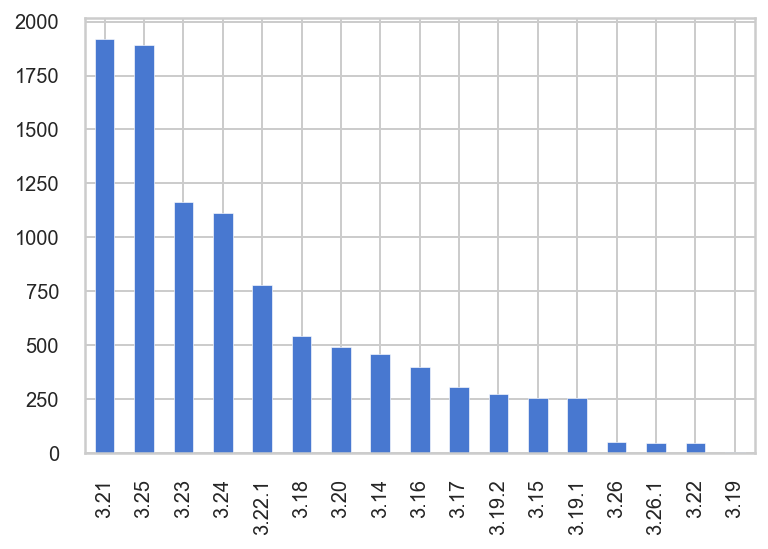

In [55]:
#Isolating fitbit app to see how many versions: 17 
app_version_fitbit = app_reviews_df.groupby('application').get_group('com.fitbit.FitbitMobile')['reviewCreatedVersion'].value_counts()
app_version_fitbit.plot(kind='bar')

In [56]:
app_version_fitbit.head()

3.21      1921
3.25      1892
3.23      1164
3.24      1111
3.22.1     779
Name: reviewCreatedVersion, dtype: int64

In [57]:
fitbit_df[fitbit_df['reviewCreatedVersion']=='3.21']['score'].value_counts(normalize=True)

1    0.330557
5    0.237897
2    0.151484
4    0.140552
3    0.139511
Name: score, dtype: float64

People didn't like version 3.21 of fitbit, it appears that versions 3.23 and 3.24 seem to be better

In [ ]:
#!pip install interact


In [58]:
# Clean this up to look at versions...
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### 👀 Version Comparison 

Version Count : 76


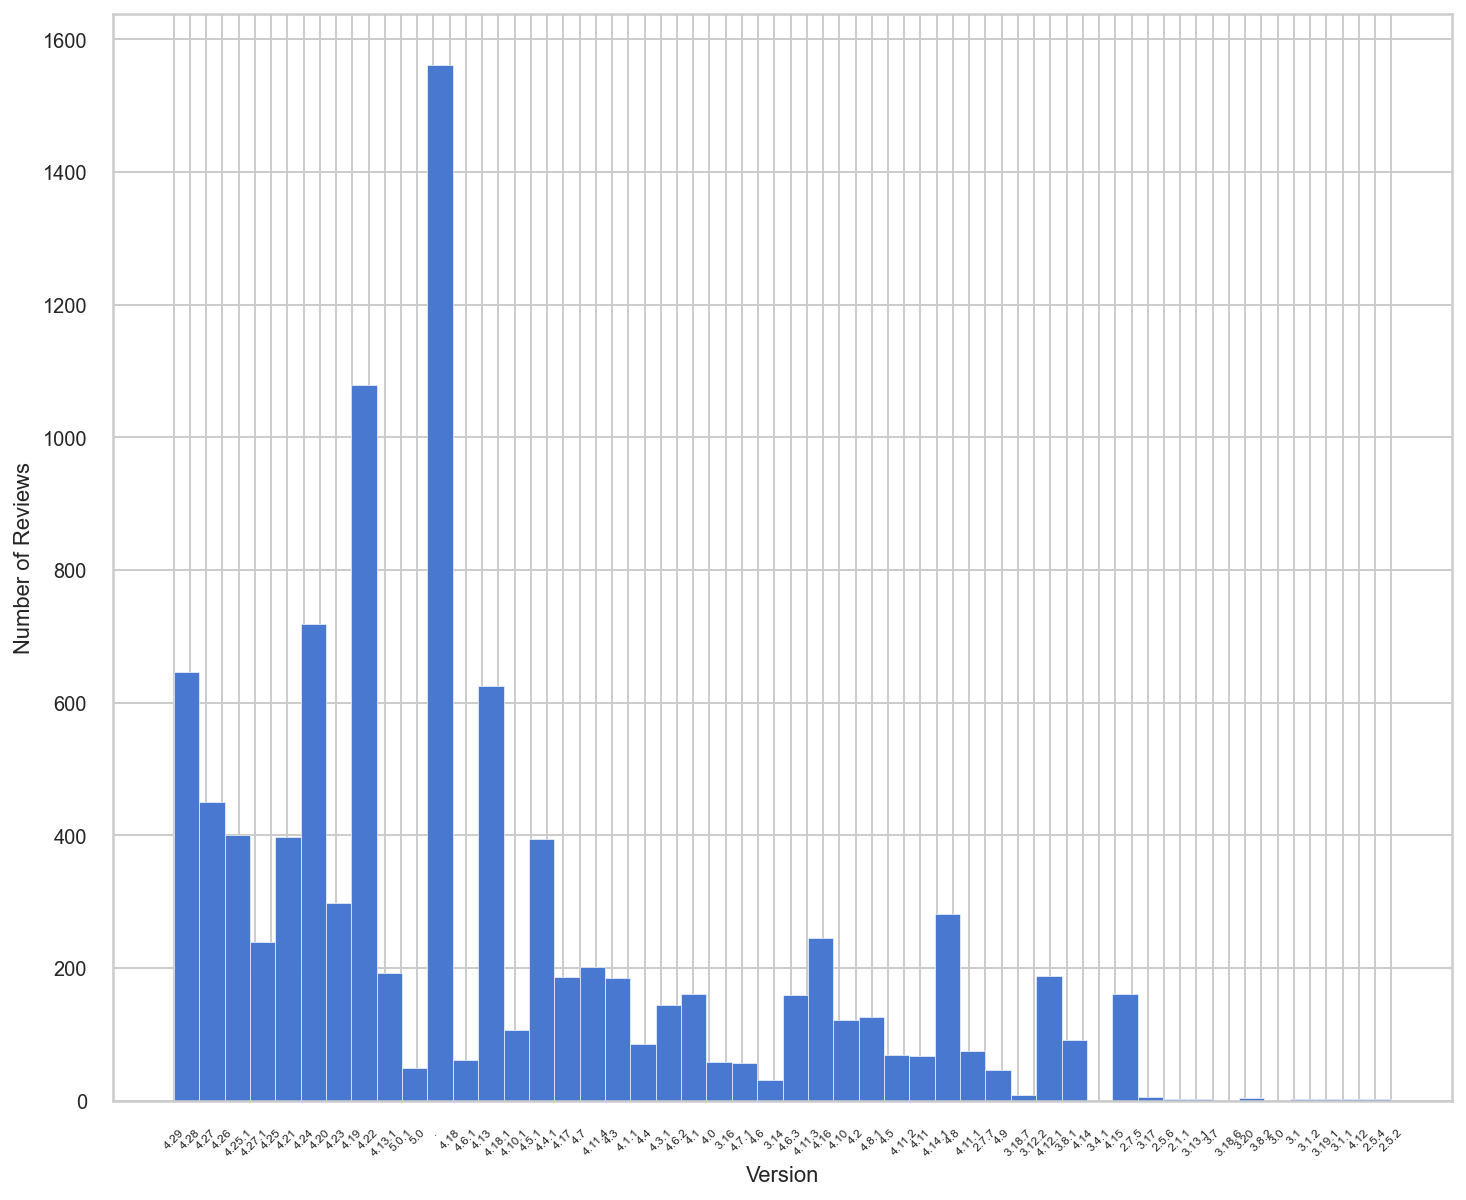

In [59]:
@interact(x=list(app_reviews_df['application'].unique()))
def plt_compare(x):
    fig = plt.figure(figsize=(12,10))
    count = len(app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].unique())
    app_reviews_df.groupby('application').get_group(x)['reviewCreatedVersion'].hist(bins='auto')
    plt.xlabel('Version')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, fontsize=6) 
    print(f'Version Count : {count}')

In [60]:
calm_df[calm_df['reviewCreatedVersion']=='4.20']['score'].value_counts(normalize=True)

5    0.765766
4    0.126126
1    0.069820
3    0.031532
2    0.006757
Name: score, dtype: float64

>**Observation:** Some versions with high review counts get better reviews and some get worse, but versions with high levels of 1's could inform improvements

In [61]:
df = app_reviews_df.copy()

In [62]:
for app in list(df['application'].unique()):
    dfapp = df[df['application'] == app]
    low_score = dfapp[dfapp['score']==1]['reviewCreatedVersion'].value_counts().head(1)
    high_score = dfapp[dfapp['score']==5]['reviewCreatedVersion'].value_counts().head(1)


    print(f'{app} Lowest rated version: {low_score.index[0]}, low rating review count: {low_score[0]} :: Highest rated version: {high_score.index[0]} , review count {high_score[0]}')
print()
print('A version of . indicates none was entered on the review')

com.calm.android Lowest rated version: ., low rating review count: 775 :: Highest rated version: 4.19 , review count 543
com.myfitnesspal.android Lowest rated version: 20.7.0, low rating review count: 379 :: Highest rated version: 20.10.0 , review count 725
com.getsomeheadspace.android Lowest rated version: ., low rating review count: 920 :: Highest rated version: 3.57.0 , review count 434
com.gen.workoutme Lowest rated version: ., low rating review count: 1289 :: Highest rated version: 3.8.2 , review count 358
com.fitbit.FitbitMobile Lowest rated version: 3.25, low rating review count: 731 :: Highest rated version: 3.21 , review count 457

A version of . indicates none was entered on the review


In [63]:
#used this to explore ways to slice out indices:
low_score = dfapp[dfapp['score']==1]['reviewCreatedVersion'].value_counts().head(1)
print(low_score.index[0], low_score[0])
low_score[0]

3.25 731


731

>**Observation** in three of the 5 cases, (calm, headspace, workoutme) lowest rated versions weren't tracked, in all cases of highest rated versions were tracked. 
>Lowest rating counts were higher in all cases with the exception of headspace.

# What's in a review?

In [64]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aosika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
#creating a df to 'clean' the content 
clean_df = df.copy()

In [ ]:
# clean_df['content'] = clean_df['content'].apply(lambda x: ' '.join([w.lower() for w in w.split() if w not in (stopwords_list)]))

# clean_df['content']

In [66]:
import functions as fn
from importlib import reload
from wordcloud import WordCloud

In [67]:
text = str(list(clean_df['content']))

In [68]:
freq_clean = fn.clean_freq(text)
#removed the word app, as it is obvious and was most frequent by 6X the next most freqent word (36901 cases)
#removing the word

## ...and the most common words used in a review are: 

In [69]:
freq_clean

[('free', 7576),
 ('time', 7414),
 ('use', 7413),
 ('love', 6885),
 ('day', 6820),
 ('get', 6735),
 ('like', 6518),
 ('really', 6300),
 ('great', 6186),
 ('sleep', 6145),
 ('meditation', 5953),
 ('fitbit', 5897),
 ('help', 5584),
 ('good', 5468),
 ('would', 5433),
 ('work', 5222),
 ('even', 4701),
 ('subscription', 4045),
 ('one', 4043),
 ('keep', 4020),
 ('pay', 4006),
 ('food', 3830),
 ('sync', 3823),
 ('year', 3787),
 ('update', 3602),
 ('much', 3451),
 ('phone', 3448),
 ('track', 3445),
 ('calm', 3409),
 ('ca', 3388),
 ('need', 3262),
 ('also', 3190),
 ('want', 3160),
 ('using', 3151),
 ('calorie', 3138),
 ('money', 3063),
 ('issue', 3053),
 ('make', 2991),
 ('thing', 2990),
 ('every', 2973),
 ('easy', 2888),
 ('trial', 2861),
 ('used', 2819),
 ('way', 2786),
 ('try', 2752),
 ('still', 2713),
 ('tried', 2683),
 ('could', 2635),
 ('premium', 2515),
 ('find', 2491),
 ('month', 2468),
 ('exercise', 2430),
 ('back', 2411),
 ('well', 2397),
 ('watch', 2383),
 ('option', 2373),
 ('everyt

In [70]:
#cleaning up tokens
clean_toks = fn.clean_tokens(text)

### 👀 Wordcloud: all apps, all reviews

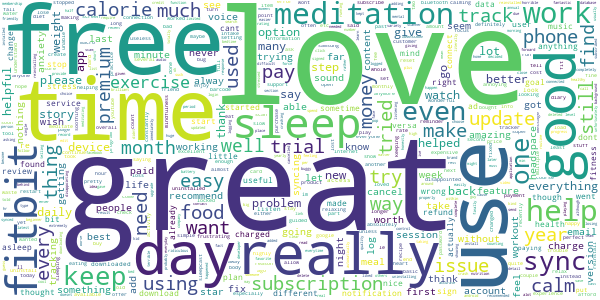

In [71]:

wordcloud = WordCloud(width=600, height=300,background_color="white", max_words=5000, 
                      contour_width=3, collocations=False, contour_color='red')

wordcloud.generate(','.join(clean_toks))

wordcloud.to_image()


>This could be informative for highest and lowest rating

In [72]:
#cleaning the text to remove punctuation and word fragments as well as the word 'app' which occurs 6X more
#than any other word and adds no value
clean_df['content'] = clean_df['content'].apply(fn.clean_tokens)

clean_df['content']

0        [care, sleep, story, use, white, noise, freque...
1        [great, sleep, meditation, however, wish, opti...
2        [even, try, without, creating, login, inside, ...
3        [sure, low, review, really, good, around, enti...
4        [really, great, fact, much, content, paid, yea...
                               ...                        
49995    [blaze, classic, sync, issue, recently, able, ...
49996    [recent, update, bug, says, 'upgrading, databa...
49997    [getting, poorer, constant, updating, database...
49998    [usually, work, fine, new, update, crash, cons...
49999    [syncing, even, reboot, watch, phone, getting,...
Name: content, Length: 50000, dtype: object

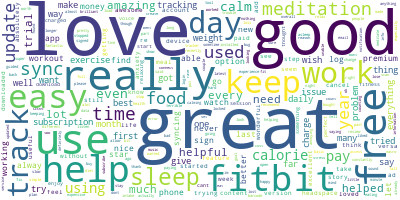

In [73]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='steelblue')

wordcloud.generate(clean_df['content'].to_string())

wordcloud.to_image()

>**Observation**: Words like great, really, good, and love are obvious and not informative as to WHAT is great. 'will most likely remove these words to get to the heart of what people are talking about. Removing these words to 'clean up' content for modeling.

In [74]:
import timestamp

In [75]:
import plotly.express as px

In [76]:
from sklearn.cluster import KMeans

# Modeling:

Using the 'clean_df' content to model since it's been lemmatized, and stopwords have been removed, including 'app' which was used 6X more than any other word.

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
clean_df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,application,replied
0,Brogan Houston,"[care, sleep, story, use, white, noise, freque...",1,835,4.29,2020-07-11 09:06:57,n/a,_,com.calm.android,False
1,Aubrey Karim,"[great, sleep, meditation, however, wish, opti...",4,338,4.29,2020-07-07 16:40:53,n/a,_,com.calm.android,False
2,Glenneroo,"[even, try, without, creating, login, inside, ...",1,693,4.29,2020-07-07 19:32:31,n/a,_,com.calm.android,False
3,Nathan T.,"[sure, low, review, really, good, around, enti...",5,304,4.29,2020-07-07 21:05:20,n/a,_,com.calm.android,False
4,Kylie O,"[really, great, fact, much, content, paid, yea...",3,523,4.29,2020-07-15 05:49:42,n/a,_,com.calm.android,False


## Preprocessing

>Since the best in class '5 Stars' and worst in class '1 Star' reviews is what would be most informative, the data will be categorized as such: 'good' is rated 5 Stars, 'bad' was rated 1 Star, and 'neutral' will be 2-4 stars.

In [79]:
stars_dict = {5:'good', 4:'neutral', 3: 'neutral', 2:'neutral', 1:'bad'}
clean_df['Target'] = clean_df['score'].map(stars_dict)

In [ ]:
#!pip install yellowbrick

In [80]:
#creating a postive sentiment dataset:
good_clean_df = clean_df[clean_df['Target']=='good']

In [ ]:
from wordcloud import WordCloud

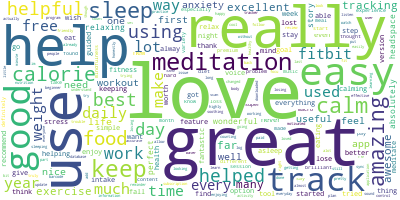

In [81]:
gcwordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, collocations=False, contour_color='steelblue')

gcwordcloud.generate(good_clean_df['content'].to_string())

gcwordcloud.to_image()

>**Observation**: words like *'love'*, *'great'*, and *'good'* are obvious and not very informative, perhaps dropping a few to render more meaninful/insightful outcomes

In [82]:
#pulling it back together so can further clean less meaningful words:
good_clean_df['content'] = good_clean_df['content'].apply(lambda x: ' '.join(x))

In [ ]:
import functions as fn

In [ ]:
good_clean_df['content'] = good_clean_df['content'].apply(fn.good_clean_tokens)

### Baseline Values: 

In [ ]:
clean_df['Target'].value_counts(dropna=True, normalize=True)

In [ ]:
#pulling the strings back together
clean_df['content'] = clean_df['content'].apply(lambda x: ' '.join(x))

In [ ]:
reload(fn)

In [ ]:
clean_df['content'] = clean_df['content'].apply(fn.clean_tokens)

In [ ]:
X = clean_df['content'].apply(lambda x: ' '.join(x))
y = clean_df['Target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

## Various Classification Models, Multi NB, LinearSVC, LogReg

https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

 Laplace smoothing , which is a technique for smoothing categorical data. A small-sample correction, or pseudo-count, will be incorporated in every probability estimate. Consequently, no probability will be zero. this is a way of regularizing Naive Bayes, and when the pseudo-count is zero, it is called Laplace smoothing. While in the general case it is often called Lidstone smoothing.

In [ ]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB(alpha=6)),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report, accuracy_score
y_pred = nb.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


In [ ]:
#to get information from both the scalers and classifiers
scaler = nb.named_steps['tfidf']
classifier = nb.named_steps['clf']

In [ ]:
classifier.coef_

### run this to get feature names

In [ ]:
scaler.get_feature_names()

theorized that the best model for nlp is Linear Support Vector Machine..
https://scikit-learn.org/stable/modules/svm.html#svm-kernels

In [ ]:
from sklearn.svm import LinearSVC

lSVC = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(dual=False ,multi_class='ovr',C=.7, random_state=2, max_iter=5)),
               ])
lSVC.fit(X_train, y_train)


y_pred = lSVC.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


In [ ]:
lSVCscaler = lSVC.named_steps['tfidf']
lSVCclassifier = lSVC.named_steps['clf']

In [ ]:
feats = lSVCscaler.get_feature_names()

In [ ]:
lSVCclassifier.coef_[0].shape

## The most meaningful words in the model are...

In [ ]:
#creating a dictionary for each of the classes and enumerating them in 
#order to track the coefficients for each:
class_dict = {}
for i, cat in enumerate(lSVCclassifier.classes_):
    class_dict[cat] = lSVCclassifier.coef_[i]
    

In [ ]:
pd.DataFrame(lSVCclassifier.classes_)

In [ ]:
#creatging a dataframe of the output
class_coefs = pd.DataFrame(class_dict)

In [ ]:
#creating a column that tracks the features for each
class_coefs['feats'] = feats

In [ ]:
#setting the index to each of the features:
class_coefs.set_index('feats', inplace=True)

In [ ]:
#slicing the most meaningful negative words:
class_coefs['bad'].sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Most important words used to classify a negative review:', fontsize=14)
plt.ylabel('Word')
plt.xlabel('Mathmetical Coefficient')

In [ ]:
def plot_neg_coefs(df, classifier):
    '''Plotting function that takes a dataframe and classifier model
    and plots the top ten most negative coefficients
    
    df - dataframe that is being analysed
    classifier - multinomial classifier
    '''
    #creating a dictionary for each of the classes and enumerating them in 
    #order to track the coefficients for each:
    class_dict = {}
    for i, cat in enumerate(lSVCclassifier.classes_):
        class_dict[cat] = lSVCclassifier.coef_[i]
    
    
    #creatging a dataframe of the output
    class_coefs = pd.DataFrame(class_dict)
    
    #creating a column that tracks the features for each
    class_coefs['feats'] = feats
    
    
    

In [ ]:
lSVC.get_params()

In [ ]:
class_coefs['good'].sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Most important words used to classify a positive review:', fontsize=14)
plt.ylabel('Word')
plt.xlabel('Mathmetical Coefficient')

In [ ]:
good_top_feats = class_coefs['good'].sort_values(ascending=False).head(10)

good_top_feats.plot(kind='barh')

# ✔️ functionize the above code:

In [ ]:
#print(top_coefficients.shape)

In [ ]:
# #def plot_coefficients(classifier, feature_names, top_features=20):

# classifier = lSVCclassifier 
# feature_names = feats
# top_features = 20

# coef = classifier.coef_.ravel()
# top_positive_coefficients = np.argsort(coef)[-top_features:]
# top_negative_coefficients = np.argsort(coef)[:top_features]
# top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
# feature_names[top_coefficients]

# # create plot
# plt.figure(figsize=(15, 5))
# colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
# plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
# feature_names = np.array(feature_names)
# xplot = np.arange(1, 1 + 2 * top_features)
# plt.xticks(xplot, feature_names[top_coefficients], rotation=60, ha='right')
# plt.show()

In [ ]:
# def plot_coefficients(classifier, feature_names, top_features=20):
#     coef = classifier.coef_.ravel()
#     top_positive_coefficients = np.argsort(coef)[-top_features:]
#     top_negative_coefficients = np.argsort(coef)[:top_features]
#     top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
     
#     # create plot
#     plt.figure(figsize=(15, 5))
#     colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
#     plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
#     feature_names = np.array(feature_names)
#     xplot = np.arange(1, 1 + 2 * top_features)
#     plt.xticks(xplot, feature_names[top_coefficients], rotation=60, ha='right')
#     plt.show()
#     #use feats in here OR use pipeline
#     cv = lSVCscaler
    
#     print(len(cv.vocabulary_))
#     print(cv.get_feature_names())
#     X_train = cv.transform(data)
    
#     svm = LinearSVC()
#     svm.fit(X_train, target)
    


In [ ]:
X_train

from https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', SGDClassifier(loss='modified_huber', penalty='l2',alpha=.001, random_state=42, max_iter=6, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))


In [ ]:
X_train.describe()

In [ ]:
X_train.isnull().sum()

In [ ]:
y_train.describe()

In [ ]:
y_train.isna().sum()

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5))])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

## Modeling Result Summary: Best Model = Linear Support Vector Classification

                                           

> Greatests returns in accuracy and recall in terms of positive and negative ratings which is what we are mostly intersted in informing were realized with a Linear Support Vector Classification:  

Model | Accuracy | Positive Recall | Negative Recall | Neutral Recall |
--| --| --| --| --|
NB| 73 | 70 |92 |50|
**lSVC**|**75** |**80** | **90** | **52** |
SGDC |74 | 78 | 90 | 51|
LgReg | 71 | 73 |85|53|

In [ ]:
reload(fn)

In [ ]:
#cleaner tokens for better modeling? Dropping words like good, great, love and rubbish, terrible
X_train = X_train.apply(fn.cleaner_tokens)

In [ ]:
X_train

In [ ]:
X_train = X_train.apply(lambda x: " ".join(x))

In [ ]:
lSVC = Pipeline([('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(dual=False,multi_class='ovr', C=.7, random_state=8, max_iter=5)),
               ])
lSVC.fit(X_train, y_train)


y_pred = lSVC.predict(X_test)

print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
print(classification_report(y_test, y_pred))

>**Observation**: In terms of accuracy, the 'cleaner' tokens reduced accuracy, while improving 'good' positive sentiment recall, while depreciating 'bad' or negative sentiment recall.

# Clustering on the entire corpus across all reviews didn't provide too much insight:

Reference on KElbowVisualiser
https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. K-means is a simple unsupervised machine learning algorithm that groups data into a specified number (k) of clusters. Because the user must specify in advance what k to choose, the algorithm is somewhat naive – it assigns all members to k clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. Other metrics can also be used such as the silhouette score, the mean silhouette coefficient for all samples or the calinski_harabasz score, which computes the ratio of dispersion between and within clusters.

When these overall metrics for each model are plotted, it is possible to visually determine the best value for k. If the line chart looks like an arm, then the “elbow” (the point of inflection on the curve) is the best value of k. The “arm” can be either up or down, but if there is a strong inflection point, it is a good indication that the underlying model fits best at that point.

>**WARNING**: FIRST VISUALIZER TAKES 2 HOURS TO RUN, SECOND TAKES 1

Result from KElbowVisualizer using distortion metric indicates 5 clusters, and silhouette indicates 6

In [ ]:
import yellowbrick
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

clean_content = clean_df['content'].apply(lambda x: ' '.join(x))

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(clean_content)

tf_words = tfidf.get_feature_names()

LDA: from https://towardsdatascience.com/the-complete-guide-for-topics-extraction-in-python-a6aaa6cedbbc

In [ ]:
len(tfidf.vocabulary_)

Default metric for KElbowVisualizer is *Distortion score* which is calcluated by computing the sum of squared distances from each point to its assigned center

In [ ]:
#model used: 
# model = KMeans(random_state=0)
# visualizer = KElbowVisualizer(model, k=(1,12))

# visualizer.fit(X)
# visualizer.show()

In [ ]:
# model1 = KMeans(random_state=0)
# visualizer1 = KElbowVisualizer(model1, metric='silhouette', k=(2,10))

# visualizer1.fit(X)
# visualizer.show()

## KMeans models: 5 clusters v 6 clusters

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(X_train)



In [ ]:
kmeans = KMeans(n_clusters=5).fit(tfidf)

In [ ]:
preds = kmeans.predict(tfidf_vectorizer.transform(X_test))

In [ ]:
xtrain = pd.DataFrame(X_train)

In [ ]:
xtrain['5cluster'] = kmeans.labels_

In [ ]:
fivecluster1 = xtrain[xtrain['5cluster']== 1]

In [ ]:
type(fivecluster1)

In [ ]:
from nltk import FreqDist

In [ ]:
fivecluster1['content']

# ✔️

In [ ]:
def five_cluster_wrdcld(xtrain):
    cloud = {}
    for cluster in list(xtrain['5cluster'].unique()):
        clust_df = xtrain[xtrain['5cluster']==cluster]
            
        wrdcld5 = WordCloud(width=400, height=200, background_color="white", 
                            max_words=5000, contour_width=3, collocations=False, 
                            contour_color='steelblue')
        wrdcld5.generate(clust_df['content'].to_string())
        clustwrdcld = wrdcld5.to_image()
        fig = plt.imshow(clustwrdcld, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Cluster {cluster} WordCloud:')
        cloud[cluster]=fig
        plt.show()
    return cloud

In [ ]:
fivecluster1text = fivecluster1['content'].to_string()

In [ ]:
reload(fn)

In [ ]:
fn.clean_freq(fivecluster1text)

In [ ]:
five_cluster_wrdcld(xtrain)

In [ ]:
kmeans6 = KMeans(n_clusters=6).fit(tfidf)

In [ ]:
xtrain['6cluster'] = kmeans6.labels_

### Cluster Value Counts:

In [ ]:
xtrain['5cluster'].value_counts()

In [ ]:
xtrain['6cluster'].value_counts()

In [ ]:
reload(fn)

In [ ]:
fn.six_cluster_wrdcld(xtrain)

# More EDA: Separtating the into two parts: Good, clean clusters and Bad clean clusters to gain more distinct insight.

# Zoning in on Negative Reviews:

### 👀 Low Rated WordCloud:

In [ ]:
bad_clean_df = clean_df[clean_df['Target']=='bad']

In [ ]:
bcwordcloud = WordCloud(width=500, height=300, background_color="black", 
                        max_words=5000, contour_width=3, collocations=False, 
                        contour_color='steelblue')

bcwordcloud.generate(bad_clean_df['content'].to_string())

bcwordcloud.to_image()

In [ ]:
#pulling it back together so can further clean less meaningful words:
bad_clean_df['content'] = bad_clean_df['content'].apply(lambda x: ' '.join(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#making a copy of the bad_clean_df to do some clustering analysis


In [ ]:
bad_clean_df.head()

# Negative Sentiment Clustering : 

Using an elbow plot to find ideal number of clusters for negative reviews

In [ ]:
reload(fn)

In [ ]:
#cleaning the tokens with the same cleaner
bad_clean_df['content'] = bad_clean_df['content'].apply(fn.clean_tokens)

In [ ]:
negtext = bad_clean_df['content'].to_string()

In [ ]:
#reload(fn)

In [ ]:
freq_neg = fn.clean_freq(negtext)

## The most frequently used words in negative reviews are: 

In [ ]:
freq_neg

https://www.knime.com/blog/topic-extraction-optimizing-the-number-of-topics-with-the-elbow-method
using Kmeans clustering elbow plot to consider how many topics to use for LDA:


In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

neg_content = bad_clean_df['content'].apply(lambda x: ' '.join(x))

neg_tfidf = TfidfVectorizer()

B = neg_tfidf.fit_transform(neg_content)

neg_tf_words = neg_tfidf.get_feature_names()

In [ ]:
negmodel = KMeans(random_state=2)
visualizer_neg = KElbowVisualizer(negmodel, metric='silhouette', k=(2,10))

visualizer_neg.fit(B)
visualizer_neg.show()

This tells me that I need 6 clusters to start...

In [ ]:
btfidf_vectorizer = TfidfVectorizer()
btfidf = btfidf_vectorizer.fit_transform(neg_content)

In [ ]:
bkmeans6 = KMeans(n_clusters=6).fit(btfidf)

In [ ]:
bad_clean_df['6cluster'] = bkmeans6.labels_

bad_clean_df

In [ ]:
#visualizing clusters
bad_clean_df['6cluster'].value_counts().plot(kind='barh', color='lightgreen')
plt.title('Cluster Size for Negative Reviews: 6 Cluster Model', fontsize=16)
plt.xlabel('Token Frequency')
plt.ylabel('Cluster Number')

>**Observation** there is a clearly dominate cluster. Clusters get consistently smaller. To examine the clusters a WordCloud will be implemented for each to identify patterns or topics. 

In [ ]:
 bad_clean_df[bad_clean_df['6cluster']==3]

In [ ]:
# import plotly.express as px
# fig = px.scatter(bad_clean_df, x="comment_vectors", y="6cluster", color="6cluster")
# fig.show()

In [ ]:
fn.six_cluster_wrdcld(bad_clean_df)

>**Negative Review WordCloud Observations** : High-level observations using WordCloud, indicate that there are several issues that surface.  Most frequently, terms like 'free', 'charge', 'trial', 'cancel' , and 'subscrition' along with time periods  imply that many comments hold issue with a charge after a free trial period.  The other issues look to be technical.  Terms like 'sync', 'update' 'connect' and 'fitbit' along with other device specific terms.







## Using Latent Dirichlet Allocation (LDA) as a redundant source of clustering.  LDA is an unspervised, mixture model learning modelWhat is interesting about LDA is that words can belong to more than one cluster

In [ ]:
#for LDA.Dictionary we need a list of list of tokens:
list_of_lists = []

for row in bad_clean_df['content']:
    list_of_lists.append(row)
    
list_of_lists

In [ ]:
from gensim import corpora, models

FIXED_SEED = 41

# before training/inference:
np.random.seed(FIXED_SEED)

#instantiating the Dictionary, pulling out the words that occur less than 3 times and 
#creating the corpus:
dictionary_LDA = corpora.Dictionary(list_of_lists)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_lists]

#as indicated by elbowplot:
num_topics = 5
#instantiating the model
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=10, alpha=[0.1]*num_topics, \
                                  eta=[0.5]*len(dictionary_LDA.keys()))

In [ ]:
#to see in each topics what words are associated with them: 

for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

In [ ]:
#!pip install pyLDAvis

In [ ]:
#instaciating and visualizing interactive lda model:
FIXED_SEED = 41
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
%time vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
%time pyLDAvis.display(vis)

In [ ]:
#moving to .html for dashboard
neg_vis_tohtml = pyLDAvis.prepared_data_to_html(vis, d3_url=None, ldavis_url=None, ldavis_css_url=None, template_type='general', visid=None, use_http=False)

### 👀 High Rated WordCloud

In [ ]:

gcwordcloud = WordCloud(width=500, height=300, background_color="white", max_words=5000, contour_width=3, collocations=False,
                        contour_color='steelblue')

gcwordcloud.generate(good_clean_df['content'].to_string())

gcwordcloud.to_image()



In [ ]:
goodcleantext =  str(list(good_clean_df['content']))

In [ ]:
good_freq_clean = fn.clean_freq(goodcleantext)

## And the top words in a positive review are: 

In [ ]:
good_freq_clean

In [ ]:
good_clean_df

In [ ]:
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

pos_content = good_clean_df['content'].apply(lambda x: ' '.join(x))

pos_tfidf = TfidfVectorizer()

P = pos_tfidf.fit_transform(pos_content)

pos_tf_words = pos_tfidf.get_feature_names()

K-Means Clustering for Positive Sentiment: 7 clusters:

In [ ]:
#for LDA.Dictionary we need a list of list of tokens:
pos_list_of_lists = []

for row in good_clean_df['content']:
    pos_list_of_lists.append(row)
    
pos_list_of_lists

In [ ]:
np.random.seed(42)

#instantiating the Dictionary, pulling out the words that occur less than 3 times and 
#creating the corpus:
dictionary_LDA_pos = corpora.Dictionary(pos_list_of_lists)
dictionary_LDA_pos.filter_extremes(no_below=3)
corpus = [dictionary_LDA_pos.doc2bow(list_of_tokens) for list_of_tokens in pos_list_of_lists]

#as indicated by elbowplot:
num_topics = 6
#instantiating the model
%time lda_model_pos = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA_pos, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA_pos.keys()))

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    from gensim.models.wrappers import LdaMallet
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gs.models.wrappers.LdaMallet(mallet_path='/home/aosika/mallet-2.0.7/bin/mallet', corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [ ]:

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary_LDA_pos, corpus, pos_list_of_lists, limit=10, step=1)

In [ ]:
#to see in each topics what words are associated with them: 

for i,topic in lda_model_pos.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(str(i)+": "+ topic)
    print()

In [ ]:
3

A classical clustering algorithm (like k-means or hierarchical clustering) gives you one label per document.

Topic modeling gives you a probabilistic composition of the document (so a document has a set of weighted labels). In addition, it gives you topics that are probability distributions over words.

Note that both procedures are unsupervised learning and far from being perfect, no matter how impressing the results may look at first sight. Apply them to dataset you understand well first

In [ ]:
np.random.seed(42)
#instaciating and visualizing interactive lda model:

%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
pos_vis = pyLDAvis.gensim.prepare(topic_model=lda_model_pos, corpus=corpus, dictionary=dictionary_LDA_pos)
pyLDAvis.enable_notebook()
pyLDAvis.display(pos_vis)

Demonstrating what topic a good review falls into:

In [ ]:

new_review = 'I like tracking my time and having the feedback'
tokens = fn.clean_tokens(new_review)
lda_model_pos[dictionary_LDA.doc2bow(tokens)]

In [ ]:
import gensim as gs

In [ ]:
from gensim.models import Phrases 

In [ ]:
# Build the bigram and trigram models
pos_bigram = gs.models.Phrases(pos_content, min_count=5, threshold=50) # higher threshold fewer phrases.
pos_trigram = gs.models.Phrases(pos_bigram[pos_content], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod_pos = gs.models.phrases.Phraser(pos_bigram)
trigram_mod_pos = gs.models.phrases.Phraser(pos_trigram)

# See trigram example
print(trigram_mod_pos[bigram_mod_pos[pos_content]])

In [ ]:
#pyLDAvis.prepared_data_to_html(pos_vis)

In [ ]:
from collections import Counter, defaultdict


In [ ]:
print(Counter(.labels_))

In [ ]:
# kmean = Pipeline([('tfidf', TfidfVectorizer()),
#                 ('KMeans', KMeans(6)),
#                ])
# kmean.fit(X_train, y_train)


# y_pred = kmean.predict(X_test)

# print('Accracy Score: %s' % round(accuracy_score(y_pred, y_test),2))
# print(classification_report(y_test, y_pred))

In [ ]:
# import sklearn.metrics as metrics

# ks = range (1,12)
# inertia = []


# for k in ks:
#     model1 = KMeans(n_clusters=k)
#     model1.fit(X)
#     inertia.append(model.inertia_)
    
# plt.plot(ks, inertia)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.xticks(ks)
# plt.show()

https://medium.com/@rohithramesh1991/unsupervised-text-clustering-using-natural-language-processing-nlp-1a8bc18b048d

In [ ]:
#Label Encode and save for inverse_transform

#create a dictionary
encoders = {}

for col in cat_cols:
    #Instanciate labelencoder
    encoders[col] = LabelEncoder()
    #encode the categorical data
    df[col] = encoders[col].fit_transform(df[col])

df(cat_cols)

In [ ]:
def five_cluster_wrdcld(df['col']):
    cloud = {}
    for cluster in list(xtrain['5cluster'].unique()):
        clust_df = xtrain[xtrain['5cluster']==cluster]
            
        wrdcld5 = WordCloud(width=400, height=200, background_color="white", 
                            max_words=5000, contour_width=3, collocations=False, 
                            contour_color='steelblue')
        wrdcld5.generate(clust_df['content'].to_string())
        clustwrdcld = wrdcld5.to_image()
        fig = plt.imshow(clustwrdcld, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Cluster {cluster} WordCloud:')
        cloud[cluster]=fig
        plt.show()
    return cloud
    
    
    

In [ ]:
col_nans = df.isna().sum(axis=0)
col_nans

In [ ]:
df1 = app_reviews_df.copy()

In [ ]:
df1.head()